# Market Segmentation in SBI life Insurance

#  Overview

### **Objective :**
To develop a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups. 
### **Data Description :**
The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
### **Data :**  
Data Set: https://www.kaggle.com/arjunbhasin2013/ccdata

### **Attribute Information :**
Following is the Data Dictionary for customer's credit card dataset :-


- CUSTID: Identification of Credit Card holder (Categorical)

- BALANCE: Balance amount left in their account to make purchases

- BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not - frequently updated)

- PURCHASES: Amount of purchases made from account

- ONEOFFPURCHASES: Maximum purchase amount done in one-go

- INSTALLMENTSPURCHASES: Amount of purchase done in installment

- CASHADVANCE: Cash in advance given by the user

- PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently -      purchased, 0 = not frequently purchased)

- ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not  frequently purchased)

- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

- CASHADVANCEFREQUENCY: How frequently the cash in advance being paid

- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"

- PURCHASESTRX: Number of purchase transactions made

- CREDITLIMIT: Limit of Credit Card for user

- PAYMENTS: Amount of Payment done by user

- MINIMUM_PAYMENTS: Minimum amount of payments made by user

- PRCFULLPAYMENT: Percent of full payment paid by user

- TENURE: Tenure of credit card service for user


#  Import Libraries:

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import pandas as pd
from sklearn.datasets import make_blobs


# Load Dataset:

In [32]:
# imporingt the dataset
creditcard_df = pd.read_csv(r"C:\Users\krish\OneDrive\Documents\DAIICT\SEM 1\ml\Visinory vectores - 1\Unsupervised\CC GENERAL.csv")
creditcard_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

# Exploratory Data Analysis & Data Cleaning:

In [33]:
creditcard_df.shape


(8950, 18)

In [34]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [35]:
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [36]:
# checking for Null values in data frame
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [37]:
zero_counts = (creditcard_df == 0).sum()
print(zero_counts)

CUST_ID                                0
BALANCE                               80
BALANCE_FREQUENCY                     80
PURCHASES                           2044
ONEOFF_PURCHASES                    4302
INSTALLMENTS_PURCHASES              3916
CASH_ADVANCE                        4628
PURCHASES_FREQUENCY                 2043
ONEOFF_PURCHASES_FREQUENCY          4302
PURCHASES_INSTALLMENTS_FREQUENCY    3915
CASH_ADVANCE_FREQUENCY              4628
CASH_ADVANCE_TRX                    4628
PURCHASES_TRX                       2044
CREDIT_LIMIT                           0
PAYMENTS                             240
MINIMUM_PAYMENTS                       0
PRC_FULL_PAYMENT                    5903
TENURE                                 0
dtype: int64


In [38]:
# Looking at PAYMENTS that's below MINIMUM_PAYMENTS

print('Shape:', creditcard_df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(creditcard_df['MINIMUM_PAYMENTS'].notna()) & (creditcard_df['PAYMENTS'] < creditcard_df['MINIMUM_PAYMENTS'])].shape)
creditcard_df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(creditcard_df['MINIMUM_PAYMENTS'].notna()) & (creditcard_df['PAYMENTS'] < creditcard_df['MINIMUM_PAYMENTS'])].head()

Shape: (2365, 2)


PAYMENTS  MINIMUM_PAYMENTS
2    622.066742        627.284787
5   1400.057770       2407.246035
10  1083.301007       2172.697765
14   805.647974        989.962866
15  1993.439277       2109.906490

Logically, payments should be done if PAYMENTS above MINIMUM_PAYMENTS. Which is true for 6272 customers.
But on the other hand, we got 2364 customers who did the PAYMENTS below MINIMUM_PAYMENTS which lead to invalid values. But we would like to leave it that way.
Hence, we fill the missing values by the mean of PAYMENTS
if PAYMENTS is less than MINIMUM_PAYMENTS, the missing values will be filled by the correspond PAYMENT

In [39]:
minpay = creditcard_df['MINIMUM_PAYMENTS'].copy()  
payments_mean = np.mean(creditcard_df['PAYMENTS']) 

i = 0
for payments, minpayments in zip(creditcard_df['PAYMENTS'], creditcard_df['MINIMUM_PAYMENTS'].isna()):
    if (payments == 0) and (minpayments == True):
        minpay[i] = 0
    elif (0 < payments < payments_mean) and (minpayments == True): 
        minpay[i] = payments
    elif minpayments == True:  
        minpay[i] = payments_mean
    i += 1
    
creditcard_df['MINIMUM_PAYMENTS'] = minpay.copy()


In [40]:
creditcard_df.isna().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [41]:
# Dropping rows with null values
creditcard_df.dropna(subset = ['MINIMUM_PAYMENTS'], inplace = True)
creditcard_df.dropna(subset = ['CREDIT_LIMIT'], inplace = True)

In [42]:
creditcard_df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [43]:
# checking duplicate entries in the dataset
creditcard_df.duplicated().sum()

0

In [44]:
# dropping unnecessary columns
creditcard_df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [45]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [46]:
creditcard_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000          0.000000          0.000000      12  
4   678.334763        244.791237          0.000000      12

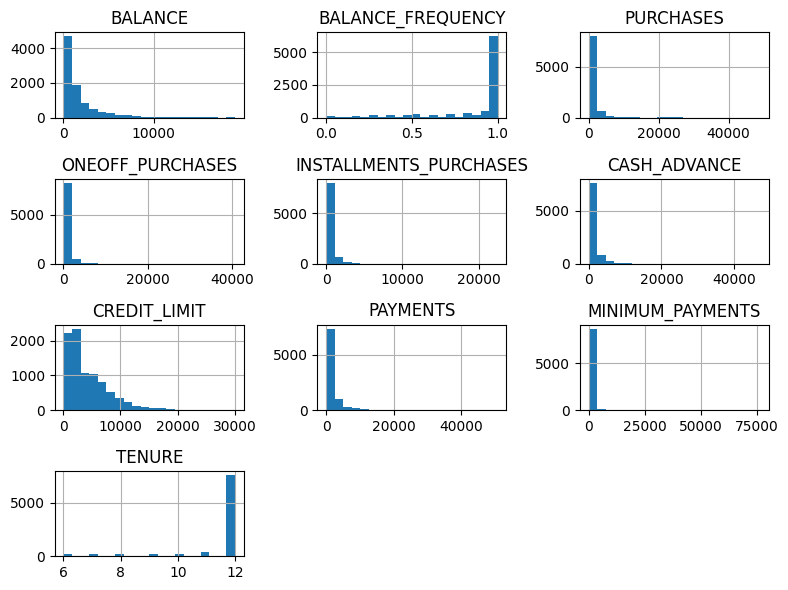

In [47]:
numeric_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                    'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']
creditcard_df[numeric_features].hist(bins=20, figsize=(8,6))
plt.tight_layout()
plt.show()

# Outlier Detection

##### Box plots to detect outliers

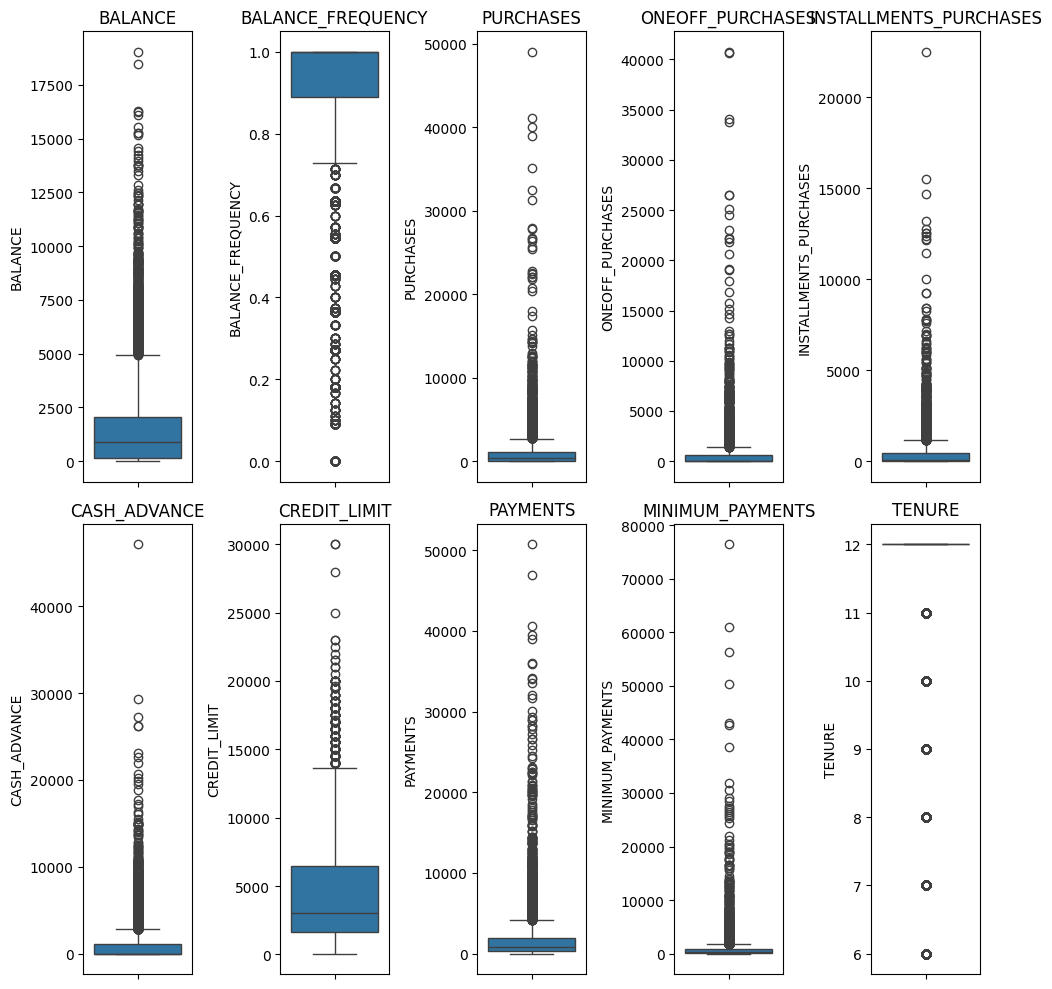

In [48]:
plt.figure(figsize=(10, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=creditcard_df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


In [49]:
# finding outlier in all columns
for i in creditcard_df.select_dtypes(include=['float64','int64']).columns:
  max_thresold = creditcard_df[i].quantile(0.95)
  min_thresold = creditcard_df[i].quantile(0.05)
  creditcard_df_no_outlier = creditcard_df[(creditcard_df[i] < max_thresold) & (creditcard_df[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((creditcard_df.shape[0]-creditcard_df_no_outlier[0])/creditcard_df.shape[0])*100),"%")

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


In [50]:
# removing outliers from columns having nearly 10% outlier
max_thresold_BALANCE = creditcard_df["BALANCE"].quantile(0.95)
min_thresold_BALANCE = creditcard_df["BALANCE"].quantile(0.05)
max_thresold_CREDIT_LIMIT = creditcard_df["CREDIT_LIMIT"].quantile(0.95)
min_thresold_CREDIT_LIMIT = creditcard_df["CREDIT_LIMIT"].quantile(0.05)
max_thresold_PAYMENTS = creditcard_df["PAYMENTS"].quantile(0.95)
min_thresold_PAYMENTS = creditcard_df["PAYMENTS"].quantile(0.05)
creditcard_df_no_outlier = creditcard_df[(creditcard_df["CREDIT_LIMIT"] < max_thresold_CREDIT_LIMIT) & (creditcard_df["CREDIT_LIMIT"] > min_thresold_CREDIT_LIMIT) & (creditcard_df["BALANCE"] < max_thresold_BALANCE) & (creditcard_df["BALANCE"] > min_thresold_BALANCE) &  (creditcard_df["PAYMENTS"] < max_thresold_PAYMENTS) & (creditcard_df["PAYMENTS"] > min_thresold_PAYMENTS)]


In [51]:
# DataFrame having no outlier
creditcard_df_no_outlier.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   
7  1823.652743           1.000000     436.20              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
7                  436.20      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
7                    0.000000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   
7                    0.00                 0             12        2300.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
7   679.065082        532.033990          0.000000      12

In [52]:
creditcard_df_no_outlier.shape

(6466, 17)

<Axes: >

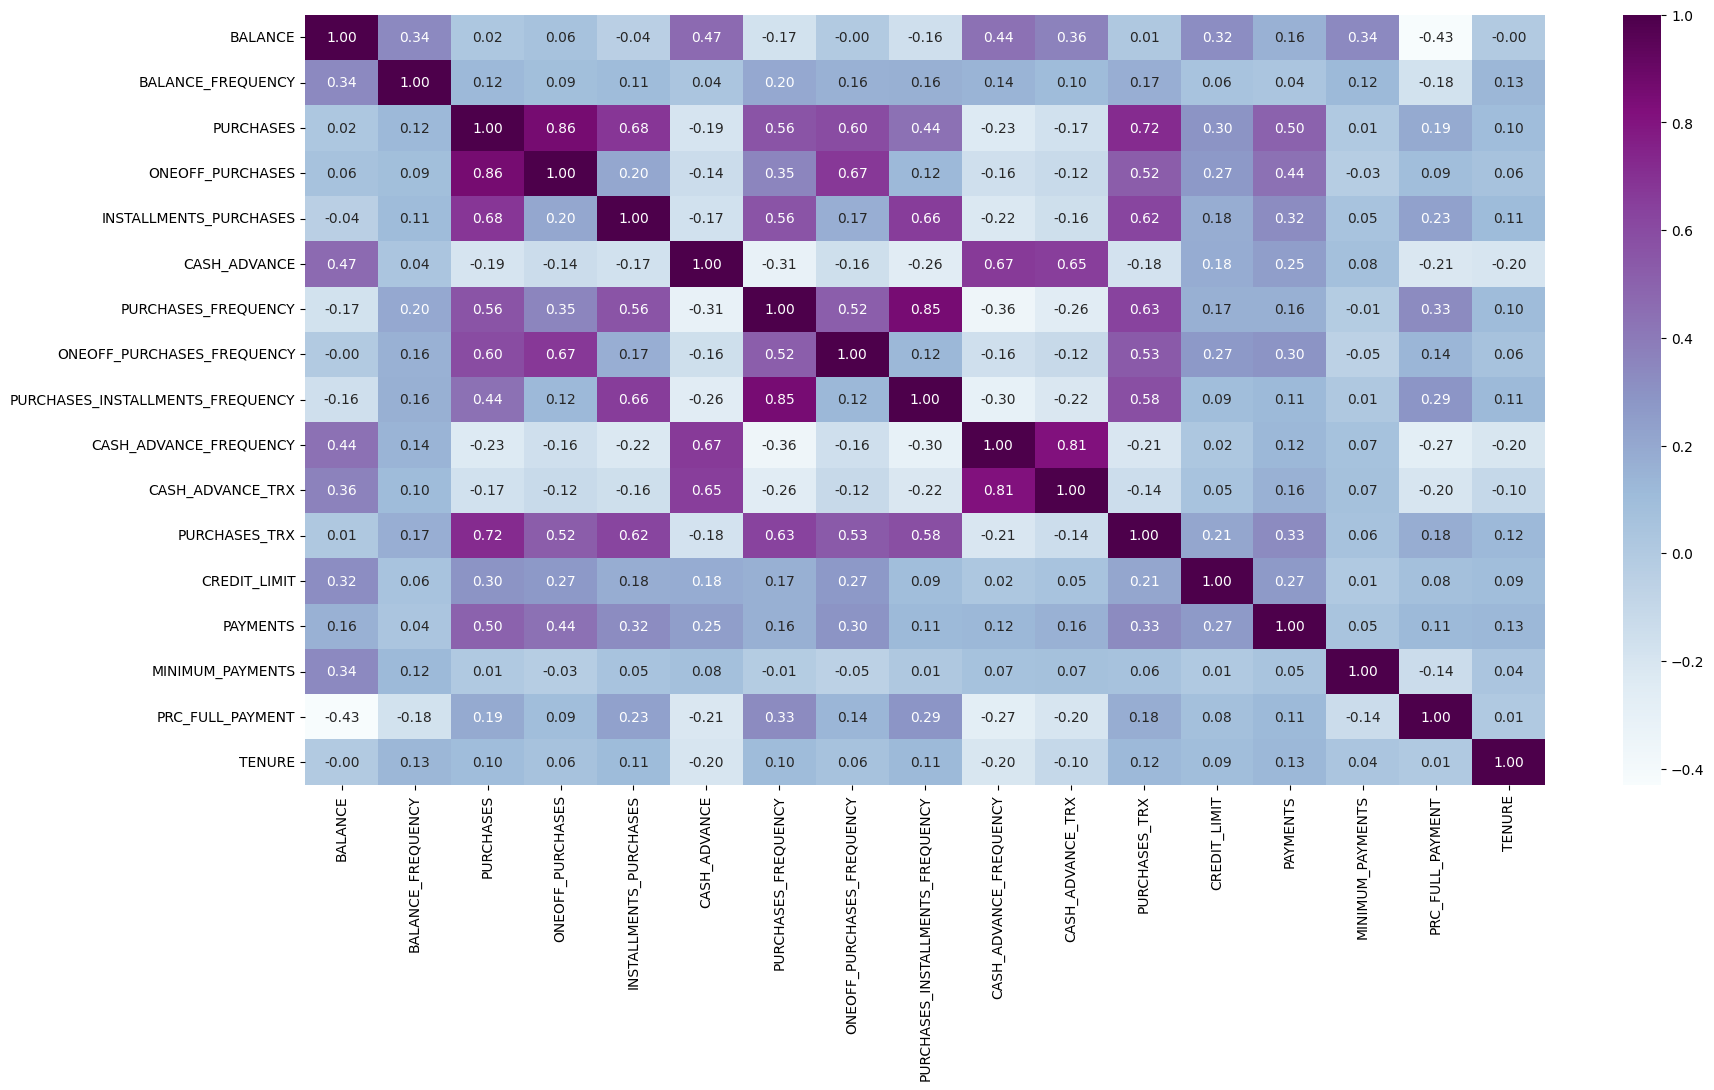

In [53]:
# correlation matrix of DataFrame
plt.figure(figsize=(20,10))
corn=creditcard_df_no_outlier.corr()
sns.heatmap(corn,annot=True,cmap="BuPu",fmt='.2f')

## From the results, we can see 3 pairs of strong correlation
1. "PURCHASES" and "ONEOFF_PURCHASES" -- 0.86
2. "PURCHASES_FREQUENCY" and 'PURCHASES_INSTALLMENT_FREQUENCY' --0.85
3. "CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY" --0.81

# Scaling the data


Normalize Skewed Data:

Log scaling is commonly used for data that has a long tail or is heavily skewed.

Large values are compressed more than small ones, making the distribution more balanced.

In [54]:
logscaled_data = np.log2(creditcard_df + 0.01)
logscaled_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   5.354408          -0.271980   6.576069         -6.643856   
1  11.644973          -0.121720  -6.643856         -6.643856   
2  11.284916           0.014355   9.594661          9.594661   
3  10.702762          -0.629581  10.549794         10.549794   
4   9.675471           0.014355   4.000901          4.000901   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                6.576069     -6.643856            -2.500896   
1               -6.643856     12.653507            -6.643856   
2               -6.643856     -6.643856             0.014355   
3               -6.643856      7.685085            -3.421469   
4               -6.643856     -6.643856            -3.421469   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -6.643856                         -3.421469   
1                   -6.643856                         -6.643856   
2                    0.014355                         -6.643856   
3                   -3.421469                         -6.643856   
4                   -3.421469                         -6.643856   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -6.643856         -6.643856       1.007196      9.965799   
1               -1.943416          2.003602      -6.643856     12.773141   
2               -6.643856         -6.643856       3.586164     12.872677   
3               -3.421469          0.014355       0.014355     12.872677   
4               -6.643856         -6.643856       0.014355     10.228831   

    PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0   7.656869          7.124326         -6.643856  3.586164  
1  12.002478         10.066560         -2.106423  3.586164  
2   9.280949          9.293000         -6.643856  3.586164  
3  -6.643856         -6.643856         -6.643856  3.586164  
4   9.405875          7.935467         -6.643856  3.586164

 MinMaxScaler rescales the data set in such a way that all features values are in the range [0, 1]. This is done by feature-wise in an independent way.

In [ ]:
minMaxScaler = MinMaxScaler().fit_transform(logscaled_data)

In [56]:
# Converting the scaled data back to a DataFrame
creditcard_scaled_df = pd.DataFrame(minMaxScaler, columns=creditcard_df_no_outlier.columns)

In [57]:
creditcard_scaled_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.575157           0.956995   0.594808          0.000000   
1     0.876706           0.979563   0.000000          0.000000   
2     0.859446           1.000000   0.730625          0.739500   
3     0.831540           0.903287   0.773600          0.782997   
4     0.782295           1.000000   0.478943          0.484761   
...        ...                ...        ...               ...   
8944  0.550166           1.000000   0.667223          0.000000   
8945  0.522816           1.000000   0.669173          0.000000   
8946  0.536547           0.960923   0.621713          0.000000   
8947  0.498315           0.960923   0.000000          0.000000   
8948  0.727957           0.913214   0.753111          0.762259   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.626492      0.000000             0.622233   
1                   0.000000      0.870488             0.000000   
2                   0.000000      0.000000             1.000000   
3                   0.000000      0.646367             0.483972   
4                   0.000000      0.000000             0.483972   
...                      ...           ...                  ...   
8944                0.702764      0.000000             1.000000   
8945                0.704818      0.000000             1.000000   
8946                0.654830      0.000000             0.960923   
8947                0.000000      0.533930             0.000000   
8948                0.000000      0.614978             0.913214   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.483972   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.483972                          0.000000   
4                       0.483972                          0.000000   
...                          ...                               ...   
8944                    0.000000                          0.960923   
8945                    0.000000                          0.960923   
8946                    0.000000                          0.913214   
8947                    0.000000                          0.000000   
8948                    0.913214                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       0.505764      0.468293   
1                   0.649375          0.636475       0.000000      0.772495   
2                   0.000000          0.000000       0.676244      0.783281   
3                   0.445179          0.490061       0.440133      0.783281   
4                   0.000000          0.000000       0.440133      0.496795   
...                      ...               ...            ...           ...   
8944                0.000000          0.000000       0.610219      0.468293   
8945                0.000000          0.000000       0.610219      0.468293   
8946                0.000000          0.000000       0.592863      0.468293   
8947                0.572358          0.563137       0.000000      0.359935   
8948                0.704787          0.563137       0.738251      0.496795   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.642032          0.602144          0.000000     1.0  
1     0.837128          0.730821          0.681479     1.0  
2     0.714945          0.696990          0.000000     1.0  
3     0.000000          0.000000          0.000000     1.0  
4     0.720554          0.637619          0.000000     1.0  
...        ...               ...               ...     ...  
8944  0.673014          0.535988          0.851944     0.0  
8945  0.662279          0.645158          0.000000     0.0  
8946  0.583128          0.568938          0.705961     0.0  
8947  0.5

# Dimensionality reduction

-> This can be done for a variety of reasons, such as to reduce the complexity of a model, to reduce the storage space, to improve the performance of a learning algorithm, or to make it easier to visualize the data. 


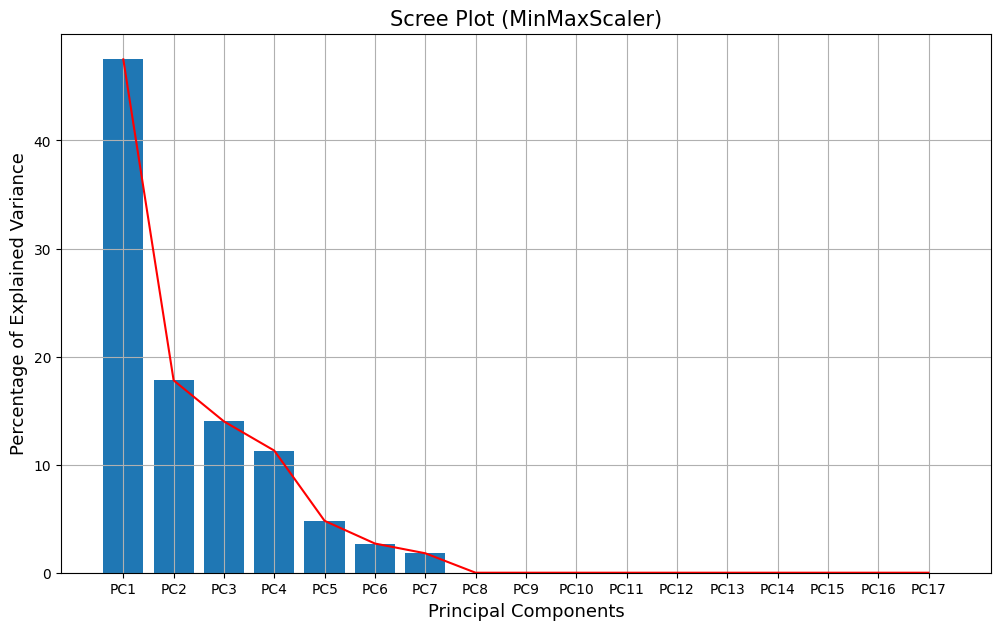

79.3% variance of the dataset lies on the first 3 Principal Components


In [58]:
pca = PCA(n_components = 17)
pca.fit(creditcard_df)
pca_data = pca.transform(creditcard_df)

def scree_plot(pca, scaler):
    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

    plt.figure(figsize = (12,7))
    plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
    plt.plot(range(1,len(per_var)+1), per_var, c = 'red')
    plt.ylabel('Percentage of Explained Variance', size = 13)
    plt.xlabel('Principal Components', size = 13)
    plt.title('Scree Plot (%s)' %(scaler), size = 15)
    plt.grid()
    plt.show()
    print('%s%% variance of the dataset lies on the first 3 Principal Components'  %(np.sum(per_var[:3])))

scree_plot(pca, 'MinMaxScaler')

In [59]:
# converting the DataFrame into 2D DataFrame for visualization
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(creditcard_scaled_df)
creditcard_pca_df = pd.DataFrame(data=principal_comp,columns=["pca1","pca2","pca3"])
creditcard_pca_df.head()

pca1      pca2      pca3
0 -0.158645 -0.665685 -0.218150
1  1.368977 -0.236071  0.039075
2 -0.371290  0.694491 -0.828309
3  0.465680  0.608038 -0.323123
4  0.159048  0.097973 -0.843766

#  Elbow Curve

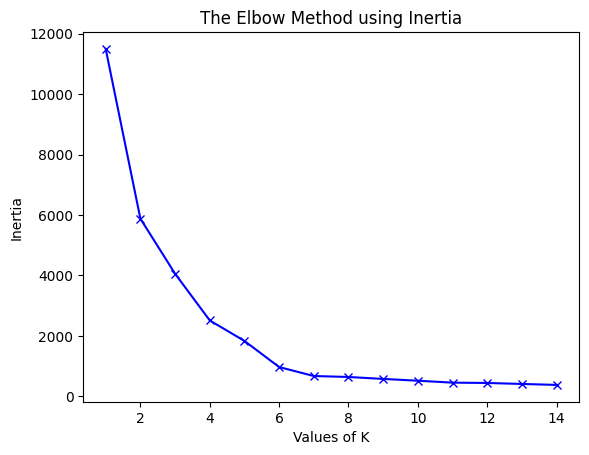

In [60]:
inertia = []
range_val = range(1,15)
for i in range_val:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(creditcard_pca_df))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

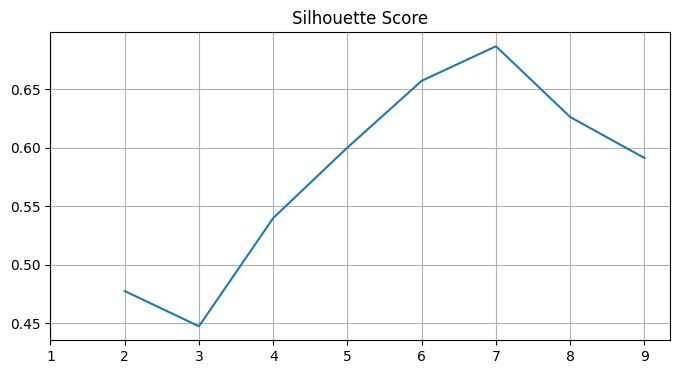

In [61]:
silh = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i) 
    kmeans.fit(creditcard_pca_df)
   
    silh.append(silhouette_score(creditcard_pca_df, kmeans.labels_))


plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

##### Using the elbow method to find optimal K.
#####
 K = 7 chosen as inertia drops significantly before flattening


#  Model Building

## K-Means Clustering

In [62]:
kmeans_model=KMeans(7)
kmeans_model.fit_predict(creditcard_pca_df)
cluster_labels=kmeans_model.labels_


In [ ]:

pca_df_kmeans = pd.concat([creditcard_pca_df, pd.DataFrame({'cluster': kmeans_model.labels_})], axis=1)


fig = px.scatter_3d(
    pca_df_kmeans, 
    x='pca1', 
    y='pca2', 
    z='pca3', 
    color='cluster', 
    title="3D Clustering using K-Means Algorithm",
    color_discrete_sequence=['red', 'green', 'blue', 'black']
)


fig.update_layout(
    scene=dict(
        xaxis_title="PCA1",
        yaxis_title="PCA2",
        zaxis_title="PCA3"
    ),
    legend_title="Cluster"
)


fig.show()


In [64]:
silhouette_avg = silhouette_score(creditcard_pca_df, cluster_labels)

print(f'Silhouette Score of KMeans: {silhouette_avg}')

Silhouette Score of KMeans: 0.6865277503916535


## hierarchical Clustering

#####   hyperperameter tuning for the best hyperparameters

In [ ]:
linkage_methods = ['ward', 'complete', 'average', 'single']
n_clusters_range = range(2, 11)  
distance_metrics = ['euclidean', 'manhattan', 'cosine']  


best_score = -1
best_n_clusters = None
best_linkage = None
best_metric = None

for linkage in linkage_methods:
    for n_clusters in n_clusters_range:
        
        if linkage == 'ward':
            metrics_to_use = ['euclidean']  
        else:
            metrics_to_use = distance_metrics 
        
        for metric in metrics_to_use:
            
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
            labels = model.fit_predict(creditcard_pca_df) 
            
          
            score = silhouette_score(creditcard_pca_df, labels)
            
           
            if score > best_score:
                best_score = score
                best_n_clusters = n_clusters
                best_linkage = linkage
                best_metric = metric


print(f"Best Silhouette Score: {best_score}")
print(f"Best Number of Clusters: {best_n_clusters}")
print(f"Best Linkage Method: {best_linkage}")
print(f"Best Distance Metric: {best_metric}")


Best Silhouette Score: 0.6862802533330135
Best Number of Clusters: 7
Best Linkage Method: average
Best Distance Metric: manhattan


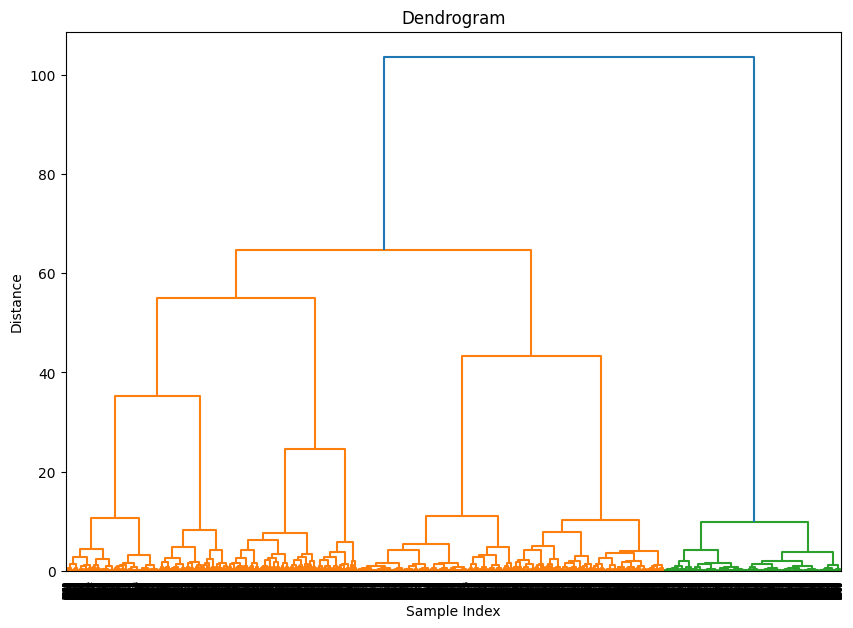

In [ ]:

data, _ = make_blobs(n_samples=10, centers=3, random_state=42)


linked = linkage(creditcard_pca_df, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [67]:
hierarchical_model = AgglomerativeClustering(n_clusters=7, metric='manhattan', linkage='average')
cluster_labels = hierarchical_model.fit_predict(creditcard_pca_df)


In [ ]:
pca_df_hierarchical = pd.concat([creditcard_pca_df, pd.DataFrame({'cluster': hierarchical_model.labels_})], axis=1)


fig = px.scatter_3d(
    pca_df_hierarchical, 
    x='pca1', 
    y='pca2', 
    z='pca3', 
    color='cluster', 
    title="3D Clustering using hierarchical Algorithm",
    color_discrete_sequence=['red', 'green', 'blue', 'black']
)


fig.update_layout(
    scene=dict(
        xaxis_title="PCA1",
        yaxis_title="PCA2",
        zaxis_title="PCA3"
    ),
    legend_title="Cluster"
)


fig.show()


##  DBSCAN 

##### hyperperameter tuning on DBSCAN hyperperameter

In [ ]:
eps_range = np.arange(0.1,2.1,0.5)  
min_samples_range = range(3, 11)  


best_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
      
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan_model.fit_predict(creditcard_pca_df)
        
        
        if len(set(cluster_labels)) > 1:  
            score = silhouette_score(creditcard_pca_df, cluster_labels)
            
            
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples


print(f"Best Silhouette Score for DBSCAN: {best_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")


Best Silhouette Score for DBSCAN: 0.6429220048286987
Best eps: 0.1
Best min_samples: 9


In [70]:
dbscan_model = DBSCAN(eps=0.1, min_samples=9)
cluster_labels = dbscan_model.fit_predict(creditcard_pca_df)

In [ ]:
pca_df_dbscan = pd.concat([creditcard_pca_df, pd.DataFrame({'cluster': dbscan_model.labels_})], axis=1)

fig = px.scatter_3d(
    pca_df_dbscan, 
    x='pca1', 
    y='pca2', 
    z='pca3', 
    color='cluster', 
    title="3D Clustering using DBSCAN Algorithm",
    color_discrete_sequence=['red', 'green', 'blue', 'black']
)


fig.update_layout(
    scene=dict(
        xaxis_title="PCA1",
        yaxis_title="PCA2",
        zaxis_title="PCA3"
    ),
    legend_title="Cluster"
)


fig.show()


## Silhoutte Score :
 
- K-Means : 0.6865277503916535

- Hierarchichal : 0.6862802533330135

- DBSCAN : 0.6429220048286987



##### We have choosen DBSCAN model for clustering in this dataset.

### Reasons for Choosing DBSCAN as the Best Model:

- Handles Noise and Outliers:

            Identifies irregular data points (Cluster -1) as noise for better analysis.


- No Need for Predefined Cluster Count:

            Automatically determines clusters based on data density.


- Identifies Arbitrarily Shaped Clusters:

            Works well for irregular credit card usage patterns.


- Works with Dense and Sparse Regions:

            Groups dense customer behaviors while isolating sparse or niche patterns.


- Handles Varying Cluster Sizes:

            Identifies both large clusters ( Cluster 1) and small ones (Cluster 7).


- Feature Scaling Robustness:

            Less sensitive to feature scaling compared to K-Means.


- Parameter Flexibility:

            Customizable eps and min_samples for domain-specific clustering.


- Real-World Suitability:

            Perfect for credit card data with noise, irregular patterns, and varying behaviors.



## Analyze Clustering Result

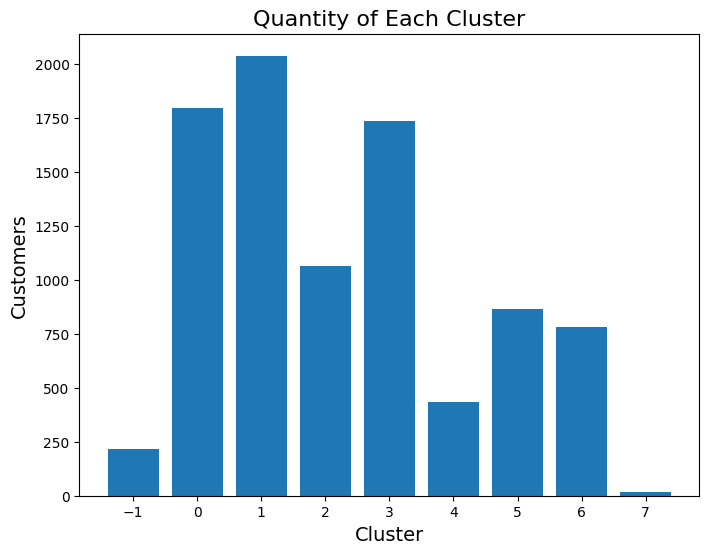

In [72]:
labels, counts = np.unique(dbscan_model.labels_, return_counts = True)

plt.figure(figsize = (8,6))
plt.title('Quantity of Each Cluster', size = 16)
plt.bar(labels, counts)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Customers', size = 14)
plt.xticks(labels)
plt.show()

In [73]:
final_data = creditcard_df.copy()
final_data['Label'] = dbscan_model.labels_
final_data.drop(final_data[final_data['Label'] == -1].index, inplace = True) 

In [74]:
final_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Label  
0      201.802084        139.509787          0.000000      12      0  
1     4103.032597       1072.340217          0.222222      12      1  
2      622.066742        627.284787          0.000000      12      2  
3        0.000000          0.000000          0.000000      12      6  
4      678.334763        244.791237          0.000000      12      2  
...           ...               ...               ...     ...    ...  
8945   325.594462         48.886365          0.500000       6      0  
8946   275.861322 

In [75]:
final_data['Label'].unique()

array([0, 1, 2, 6, 3, 4, 5, 7], dtype=int64)

In [78]:
#number of customer in each cluster
for i in zip(labels, counts):
    print('Cluster %s: %s' %(i[0],i[1]))

Cluster -1: 217
Cluster 0: 1797
Cluster 1: 2038
Cluster 2: 1065
Cluster 3: 1735
Cluster 4: 432
Cluster 5: 866
Cluster 6: 783
Cluster 7: 16


### Descriptive Statistics for each cluster

In [76]:
for i in range(7):
    print('Cluster:', i)
    display(final_data[final_data['Label'] == i].describe())
    print('\n')

Cluster: 0


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1797.000000        1797.000000   1797.000000            1797.0   
mean     399.545476           0.788915    538.394129               0.0   
std      917.893797           0.299036    887.945918               0.0   
min        0.000000           0.000000      4.800000               0.0   
25%       18.354425           0.636364    156.000000               0.0   
50%       56.215217           1.000000    322.290000               0.0   
75%      288.474257           1.000000    602.070000               0.0   
max    11670.179850           1.000000  22500.000000               0.0   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1797.000000        1797.0          1797.000000   
mean               539.404741           0.0             0.706700   
std                889.941330           0.0             0.305809   
min                  4.800000           0.0             0.083333   
25%                156.000000           0.0             0.416667   
50%                322.410000           0.0             0.833333   
75%                605.520000           0.0             1.000000   
max              22500.000000           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                      1797.0                       1797.000000   
mean                          0.0                          0.673087   
std                           0.0                          0.308680   
min                           0.0                          0.083333   
25%                           0.0                          0.416667   
50%                           0.0                          0.750000   
75%                           0.0                          1.000000   
max                           0.0                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1797.0            1797.0    1797.000000   1797.000000   
mean                      0.0               0.0      11.827490   3113.307392   
std                       0.0               0.0      12.191551   2707.493503   
min                       0.0               0.0       0.000000    300.000000   
25%                       0.0               0.0       6.000000   1400.000000   
50%                       0.0               0.0      10.000000   2500.000000   
75%                       0.0               0.0      12.000000   4000.000000   
max                       0.0               0.0     199.000000  23000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   1797.000000       1797.000000       1797.000000  1797.000000  1797.0  
mean     749.313457        682.815109          0.306187    11.507513     0.0  
std     1331.294874       3249.812213          0.368457     1.374916     0.0  
min        0.000000          0.000000          0.000000     6.000000     0.0  
25%      209.014647        109.557678          0.000000    12.000000     0.0  
50%      419.484901        163.044353          0.100000    12.000000     0.0  
75%      828.169919        216.863764          0.600000    12.000000     0.0  
max    28988.973880      76406.207520          1.000000    12.000000     0.0



Cluster: 1


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
count   2038.000000        2038.000000     2038.0            2038.0   
mean    2151.233426           0.882831        0.0               0.0   
std     2113.645632           0.232022        0.0               0.0   
min        0.000000           0.000000        0.0               0.0   
25%      752.790257           0.900000        0.0               0.0   
50%     1456.890946           1.000000        0.0               0.0   
75%     2843.805241           1.000000        0.0               0.0   
max    14581.459140           1.000000        0.0               0.0   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                  2038.0   2038.000000               2038.0   
mean                      0.0   1991.916207                  0.0   
std                       0.0   2472.119927                  0.0   
min                       0.0     18.042768                  0.0   
25%                       0.0    380.989479                  0.0   
50%                       0.0   1206.719268                  0.0   
75%                       0.0   2705.653718                  0.0   
max                       0.0  26194.049540                  0.0   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                      2038.0                            2038.0   
mean                          0.0                               0.0   
std                           0.0                               0.0   
min                           0.0                               0.0   
25%                           0.0                               0.0   
50%                           0.0                               0.0   
75%                           0.0                               0.0   
max                           0.0                               0.0   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             2038.000000       2038.000000         2038.0   2038.000000   
mean                 0.273018          6.306183            0.0   4028.737324   
std                  0.201270          8.089307            0.0   3262.082865   
min                  0.083333          1.000000            0.0     50.000000   
25%                  0.090909          2.000000            0.0   1500.000000   
50%                  0.250000          4.000000            0.0   3000.000000   
75%                  0.333333          8.000000            0.0   6000.000000   
max                  1.500000        123.000000            0.0  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   2038.000000       2038.000000       2038.000000  2038.000000  2038.0  
mean    1656.269313        971.114849          0.044291    11.319921     1.0  
std     2719.497132       2576.214148          0.138240     1.546436     0.0  
min        0.000000          0.000000          0.000000     6.000000     1.0  
25%      360.494456        249.152357          0.000000    12.000000     1.0  
50%      763.250270        471.912818          0.000000    12.000000     1.0  
75%     1728.818139        983.173809          0.000000    12.000000     1.0  
max    34107.074990      61031.618600          1.000000    12.000000     1.0



Cluster: 2


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1065.000000        1065.000000   1065.000000       1065.000000   
mean     764.027922           0.771489    875.845577        875.933775   
std     1183.287982           0.301892   1368.478997       1368.456892   
min        0.000000           0.000000      4.990000          4.990000   
25%       46.103924           0.545455    153.950000        153.950000   
50%      247.142072           1.000000    445.180000        445.180000   
75%     1086.853086           1.000000   1027.410000       1027.410000   
max    12323.845360           1.000000  17945.000000      17945.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                  1065.0        1065.0          1065.000000   
mean                      0.0           0.0             0.355678   
std                       0.0           0.0             0.313178   
min                       0.0           0.0             0.083333   
25%                       0.0           0.0             0.083333   
50%                       0.0           0.0             0.250000   
75%                       0.0           0.0             0.500000   
max                       0.0           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1065.000000                            1065.0   
mean                     0.355365                               0.0   
std                      0.313284                               0.0   
min                      0.083333                               0.0   
25%                      0.083333                               0.0   
50%                      0.250000                               0.0   
75%                      0.500000                               0.0   
max                      1.000000                               0.0   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1065.0            1065.0    1065.000000   1065.000000   
mean                      0.0               0.0       7.640376   4416.535780   
std                       0.0               0.0      13.226030   3612.513177   
min                       0.0               0.0       1.000000    150.000000   
25%                       0.0               0.0       1.000000   1600.000000   
50%                       0.0               0.0       4.000000   3000.000000   
75%                       0.0               0.0      10.000000   6500.000000   
max                       0.0               0.0     217.000000  25000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   1065.000000       1065.000000       1065.000000  1065.000000  1065.0  
mean    1198.678178        481.458158          0.135223    11.554930     2.0  
std     2344.634767       1603.962844          0.292339     1.274768     0.0  
min        0.000000          0.000000          0.000000     6.000000     2.0  
25%      287.749893        113.609710          0.000000    12.000000     2.0  
50%      577.023407        188.409994          0.000000    12.000000     2.0  
75%     1296.772849        410.924268          0.083333    12.000000     2.0  
max    50721.483360      30528.432400          1.000000    12.000000     2.0



Cluster: 3


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1735.000000        1735.000000   1735.000000       1735.000000   
mean    1217.788109           0.936659   2456.561718       1495.029683   
std     1809.120158           0.155055   3403.859857       2699.446318   
min        0.000000           0.000000     34.000000          1.400000   
25%      169.363975           1.000000    749.650000        269.515000   
50%      536.104848           1.000000   1536.310000        772.600000   
75%     1517.634102           1.000000   2854.575000       1742.965000   
max    19043.138560           1.000000  41050.400000      40624.060000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1735.000000        1735.0          1735.000000   
mean               961.560277           0.0             0.816378   
std               1332.620966           0.0             0.233899   
min                  1.950000           0.0             0.083333   
25%                233.410000           0.0             0.666667   
50%                546.510000           0.0             0.916667   
75%               1176.335000           0.0             1.000000   
max              15497.190000           0.0             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1735.000000                       1735.000000   
mean                     0.462047                          0.650425   
std                      0.333092                          0.309723   
min                      0.083333                          0.083333   
25%                      0.166667                          0.416667   
50%                      0.375000                          0.666667   
75%                      0.750000                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                  1735.0            1735.0    1735.000000   1735.000000   
mean                      0.0               0.0      34.559654   5700.075976   
std                       0.0               0.0      36.331722   3996.245066   
min                       0.0               0.0       2.000000    300.000000   
25%                       0.0               0.0      13.000000   2500.000000   
50%                       0.0               0.0      24.000000   5000.000000   
75%                       0.0               0.0      42.000000   7500.000000   
max                       0.0               0.0     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE   Label  
count   1735.000000       1735.000000       1735.000000  1735.000000  1735.0  
mean    2273.893048        609.745920          0.255949    11.805187     3.0  
std     3198.067649       1625.264896          0.357603     0.833329     0.0  
min        0.000000          0.000000          0.000000     6.000000     3.0  
25%      698.879934        169.723996          0.000000    12.000000     3.0  
50%     1343.893653        212.361801          0.000000    12.000000     3.0  
75%     2601.385418        548.414888          0.500000    12.000000     3.0  
max    36066.750680      29019.802880          1.000000    12.000000     3.0



Cluster: 4


BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count    432.000000         432.000000   432.000000             432.0   
mean    2609.951174           0.959850   518.546944               0.0   
std     2597.853994           0.116795   507.936420               0.0   
min        1.097736           0.272727     4.440000               0.0   
25%      897.549174           1.000000   194.490000               0.0   
50%     1673.693446           1.000000   352.215000               0.0   
75%     3363.320154           1.000000   662.182500               0.0   
max    16304.889250           1.000000  4059.930000               0.0   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              432.000000    432.000000           432.000000   
mean               519.238588   2094.676074             0.680525   
std                507.813928   2573.331902             0.294731   
min                  4.440000     18.531069             0.083333   
25%                194.490000    558.411378             0.416667   
50%                353.590000   1182.845453             0.750000   
75%                662.182500   2697.602060             1.000000   
max               4059.930000  19862.878440             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                       432.0                        432.000000   
mean                          0.0                          0.631160   
std                           0.0                          0.298766   
min                           0.0                          0.083333   
25%                           0.0                          0.416667   
50%                           0.0                          0.666667   
75%                           0.0                          0.916667   
max                           0.0                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              432.000000        432.000000     432.000000    432.000000   
mean                 0.264640          5.930556      12.032407   4408.796296   
std                  0.194770          6.629736      11.634370   3653.444986   
min                  0.083333          1.000000       1.000000    500.000000   
25%                  0.083333          2.000000       6.000000   1500.000000   
50%                  0.166667          4.000000       9.000000   3000.000000   
75%                  0.333333          7.000000      13.250000   6000.000000   
max                  1.000000         61.000000     111.000000  19000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  Label  
count    432.000000        432.000000        432.000000  432.000000  432.0  
mean    1984.973121       1361.523743          0.047871   11.317130    4.0  
std     3124.023650       2258.724562          0.129646    1.613137    0.0  
min        0.000000          0.000000          0.000000    6.000000    4.0  
25%      599.446940        363.993654          0.000000   12.000000    4.0  
50%     1146.547942        846.878123          0.000000   12.000000    4.0  
75%     2069.708878       1592.314519          0.000000   12.000000    4.0  
max    40627.595240      31871.363790          1.000000   12.000000    4.0



Cluster: 5


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    866.000000         866.000000    866.000000        866.000000   
mean    2920.600355           0.973191   1984.480797       1170.251871   
std     2598.010276           0.082245   1904.854841       1464.263820   
min        2.299436           0.181818     91.000000          8.900000   
25%      977.794588           1.000000    680.615000        240.532500   
50%     2138.067740           1.000000   1371.390000        683.910000   
75%     4156.819784           1.000000   2544.347500       1467.650000   
max    16259.448570           1.000000  12784.510000      11246.070000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              866.000000    866.000000           866.000000   
mean               814.254584   2083.263785             0.824310   
std                903.143002   2713.041682             0.207818   
min                  9.650000     18.126683             0.166667   
25%                241.680000    452.891967             0.666667   
50%                500.560000   1215.375189             0.916667   
75%               1090.287500   2708.861837             1.000000   
max              10009.930000  29282.109150             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  866.000000                        866.000000   
mean                     0.408835                          0.689698   
std                      0.289811                          0.271032   
min                      0.083333                          0.083333   
25%                      0.166667                          0.416667   
50%                      0.333333                          0.750000   
75%                      0.636364                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              866.000000        866.000000     866.000000    866.000000   
mean                 0.296295          7.767898      32.386836   5975.243777   
std                  0.205690          8.898811      27.522422   4148.521754   
min                  0.083333          1.000000       4.000000    300.000000   
25%                  0.148810          2.000000      13.000000   2500.000000   
50%                  0.250000          5.000000      24.000000   5000.000000   
75%                  0.416667         10.000000      42.000000   8500.000000   
max                  1.000000        107.000000     198.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  Label  
count    866.000000        866.000000        866.000000  866.000000  866.0  
mean    3027.337955       1257.988425          0.062423   11.613164    5.0  
std     3653.433219       1675.436675          0.161842    1.197015    0.0  
min        0.000000          0.000000          0.000000    6.000000    5.0  
25%      949.893451        358.686988          0.000000   12.000000    5.0  
50%     1842.161641        786.304044          0.000000   12.000000    5.0  
75%     3682.854700       1504.645610          0.083333   12.000000    5.0  
max    31698.419020      22011.779800          1.000000   12.000000    5.0



Cluster: 6


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count    783.000000         783.000000    783.000000        783.000000   
mean    2353.895156           0.929889    637.679527        637.723870   
std     2264.383886           0.161642   1309.700216       1309.680803   
min        0.000000           0.000000      8.400000          8.400000   
25%      855.064986           1.000000    116.875000        116.875000   
50%     1615.967240           1.000000    295.000000        295.000000   
75%     3138.578059           1.000000    720.600000        720.600000   
max    15258.225900           1.000000  22101.780000      22101.780000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                   783.0    783.000000           783.000000   
mean                      0.0   2015.956892             0.275728   
std                       0.0   2430.689971             0.250742   
min                       0.0     18.427395             0.083333   
25%                       0.0    378.247804             0.083333   
50%                       0.0   1157.345416             0.166667   
75%                       0.0   2747.208524             0.333333   
max                       0.0  20277.331120             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  783.000000                             783.0   
mean                     0.275622                               0.0   
std                      0.250806                               0.0   
min                      0.083333                               0.0   
25%                      0.083333                               0.0   
50%                      0.166667                               0.0   
75%                      0.333333                               0.0   
max                      1.000000                               0.0   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              783.000000        783.000000     783.000000    783.000000   
mean                 0.295393          6.795658       6.126437   4631.959828   
std                  0.210956          7.127206      13.084248   3485.616258   
min                  0.083333          1.000000       1.000000    200.000000   
25%                  0.166667          2.000000       1.000000   2000.000000   
50%                  0.250000          5.000000       3.000000   3500.000000   
75%                  0.416667          9.000000       7.000000   6500.000000   
max                  1.250000         52.000000     309.000000  20000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  Label  
count    783.000000        783.000000         783.00000  783.000000  783.0  
mean    1893.145249       1003.103810           0.05231   11.338442    6.0  
std     2834.955141       1676.622554           0.15209    1.530305    0.0  
min        0.000000          0.000000           0.00000    6.000000    6.0  
25%      486.547338        251.417618           0.00000   12.000000    6.0  
50%     1072.638864        538.259971           0.00000   12.000000    6.0  
75%     2171.738605       1148.601184           0.00000   12.000000    6.0  
max    39461.965800      19060.534750           1.00000   12.000000    6.0

## Plotting Voilon Plot
 Violin Plots helps to visualize each cluster against each feature/variable. And is used to interpret each clusters behavior and to decide how certain treatments or promotion should be done for each cluster

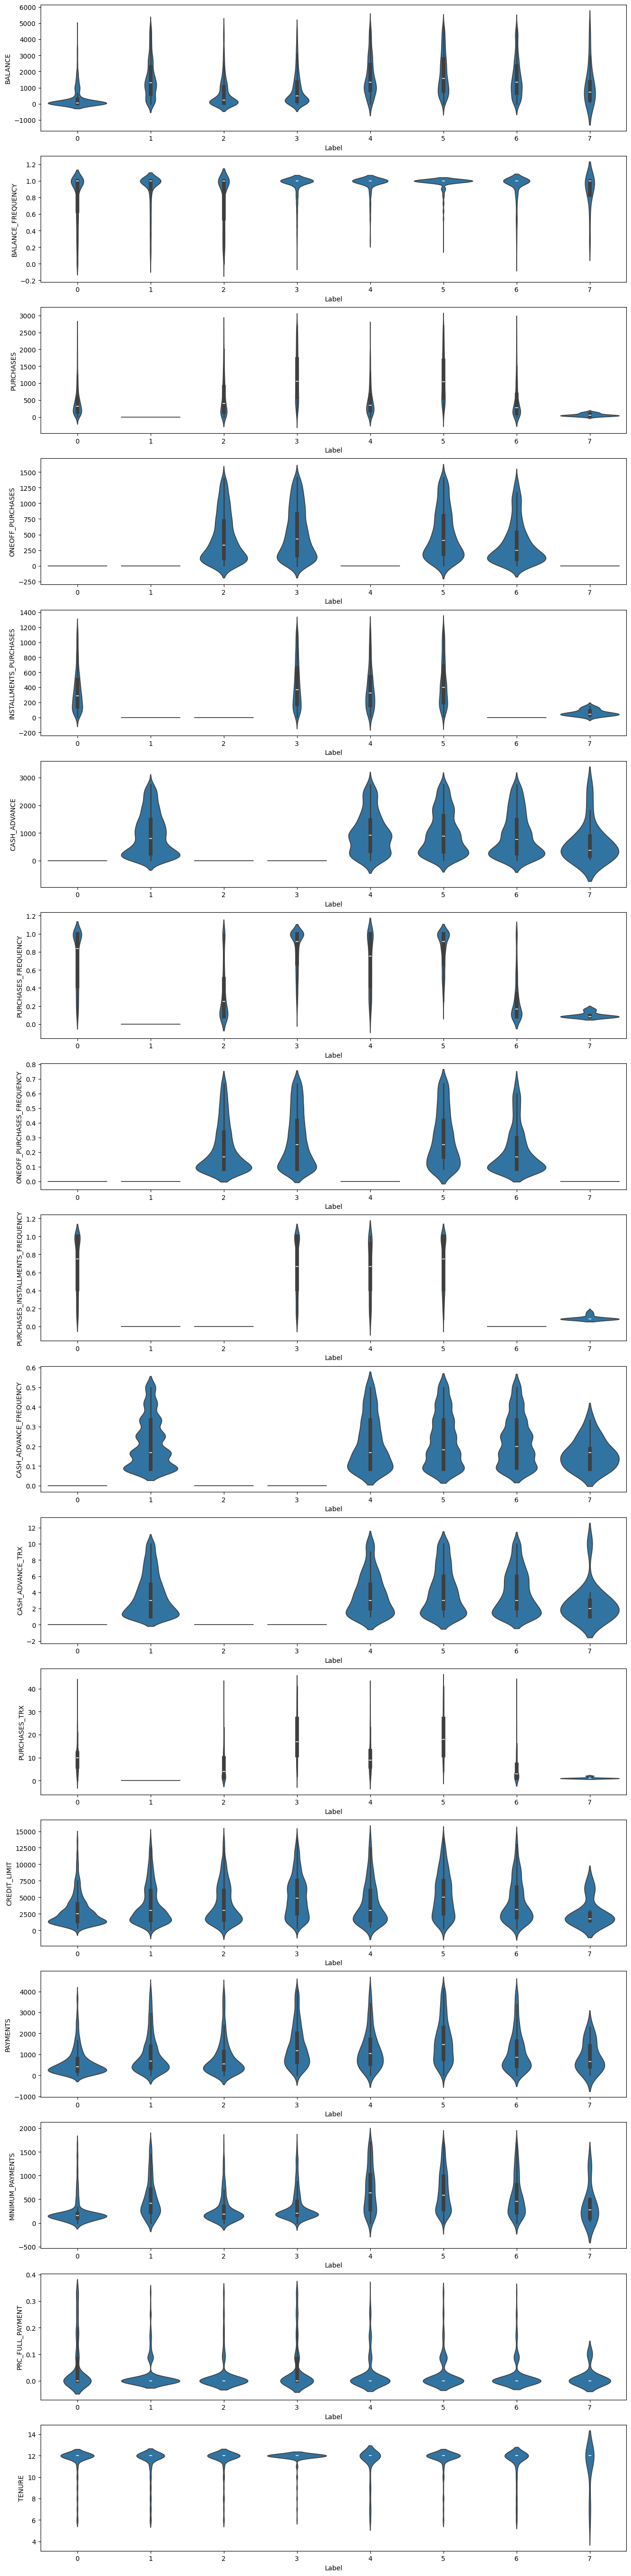

In [79]:
fig, axs = plt.subplots(nrows = 17, ncols = 1, figsize = (16,70))
for i in range(17):
    q1, q3 = np.quantile(final_data.iloc[:,i], [0.25, 0.75])
    sns.violinplot(data = final_data[['Label', final_data.columns[i]]].loc[final_data[final_data.columns[i]] <= (q3 + 1.5*(q3-q1))], x = 'Label', y = final_data.columns[i], ax = axs[i])

plt.show()


# Evaluation and Recommendations for Credit Card Utilization

## Cluster 0: Installment Purchasers


- Behavior:

Tend to make purchases using installments.

Lower overall balances and limited activity outside installment purchases.


- Recommendation:

Introduce promotions like "Buy Now, Pay Later" or low-interest installment offers to encourage higher spending.

Provide loyalty points for completing installment payments on time.

## Cluster 1: Cash Advance Users

- Behavior:

Predominantly rely on cash advances rather than purchases.

Higher balances with regular utilization of cash advances.

- Recommendation:

Offer better terms on cash advances, such as lower interest rates or waived fees.

Educate customers on other card benefits to diversify usage.

## Cluster 2: One-Off Purchasers

- Behavior:

Engage in small, one-time purchases.

Low usage of credit card features beyond single transactions.

- Recommendation:

Offer cashback or rewards for frequent usage of their cards.

Increase credit limits slightly to encourage larger one-off purchases.

## Cluster 3: Low Spenders (No Installments)

- Behavior:

Minimal spending without opting for installment plans.

Tend to underutilize the card's features.

- Recommendation:

Provide incentives for installment plans, such as 0% interest.

Run campaigns to promote higher spending, such as bonus points for reaching spending thresholds.

## Cluster 4: Big Spenders (No Cash Advances)

- Behavior:

Spend significantly but avoid cash advances.

Likely to have high balances due to large transactions.

- Recommendation:

Focus on retention with tailored loyalty programs, such as exclusive access to premium events or higher rewards 
rates.


Introduce premium benefits like concierge services or free travel insurance.

## Cluster 5: Low Financial Usage

- Behavior:

Rarely use their credit cards and have minimal transactions.

Unlikely to generate significant revenue.

- Recommendation:

Minimal engagement needed.

Consider targeting with promotional offers to encourage trial usage.

## Cluster 6: High Credit Limit, Diverse Usage

- Behavior:

Utilize all transaction types (cash advances, purchases, and installments).

Likely to be high-value customers with significant credit limits.

- Recommendation:

Reward them with points, discounts, or exclusive perks to maintain loyalty.

Offer personalized benefits, such as travel rewards or tiered membership.

## Cluster 7: Niche Segment

- Behavior:

Smaller and specific usage patterns (e.g., single-feature usage or unusual spending habits).

Likely a very small segment.

- Recommendation:

Tailor strategies to the unique behaviors within this segment.

For example, if they show preference for specific purchases, partner with related merchants for targeted offers.



